In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_red = pd.read_csv('winequality-red.csv', header=0, delimiter=';')
data_white = pd.read_csv('winequality-white.csv', header=0, delimiter=';')

#### Lets analyize white and red wine separately

In [3]:
data_white.shape

(4898, 12)

In [4]:
data_red.shape

(1599, 12)

Lets try to classify white wine first

In [6]:
data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
X_trn_w = data_white.iloc[:,0:11]
y_trn_w = data_white[['quality']]

Doing a train test split


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_trn_w, y_trn_w,test_size=0.3)

Lets try to find the feature importances using Random Forest Classifier.

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [21]:
result = clf.fit(X_train, y_train)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [22]:
clf.feature_importances_

array([ 0.07992903,  0.10540936,  0.08322416,  0.09187975,  0.08426267,
        0.08809903,  0.089354  ,  0.09230606,  0.07944705,  0.08310072,
        0.12298817])

In [25]:
feat_labels = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

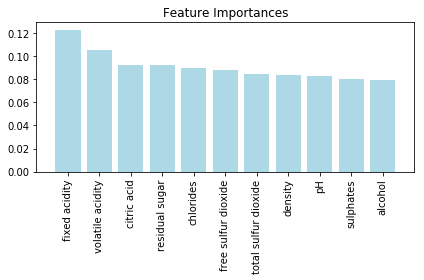

In [26]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Lets see how much accuracy it gives on the test set

In [27]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [29]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   4,   0,   0,   0],
       [  0,   9,  24,  17,   0,   0,   0],
       [  0,   8, 290, 121,   9,   0,   0],
       [  0,   2, 122, 479,  55,   3,   0],
       [  0,   0,  12, 125, 126,   4,   0],
       [  0,   0,   2,  18,  16,  20,   0],
       [  0,   0,   0,   2,   1,   0,   0]])

In [32]:
accuracy_score(y_test, y_pred)

0.62857142857142856

##### Lets see if some gradient boosting gives us a better perfomance using Grid Search

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
clf = GradientBoostingClassifier()

In [43]:
clf.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [44]:
grid = GridSearchCV(estimator=clf, param_grid={'learning_rate':[0.1,0.01,0.001], 'n_estimators':[50,100,150], 'max_depth':[3,5,7]})

In [45]:
grid.fit(X_train, y_train)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A col

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y 

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y 

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid.grid_scores_

[mean: 0.56534, std: 0.01289, params: {'learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 3},
 mean: 0.57380, std: 0.01070, params: {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3},
 mean: 0.57818, std: 0.01251, params: {'learning_rate': 0.1, 'n_estimators': 150, 'max_depth': 3},
 mean: 0.59335, std: 0.01752, params: {'learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 5},
 mean: 0.60268, std: 0.00819, params: {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 5},
 mean: 0.60677, std: 0.00579, params: {'learning_rate': 0.1, 'n_estimators': 150, 'max_depth': 5},
 mean: 0.60385, std: 0.00904, params: {'learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 7},
 mean: 0.60823, std: 0.01034, params: {'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 7},
 mean: 0.60618, std: 0.00439, params: {'learning_rate': 0.1, 'n_estimators': 150, 'max_depth': 7},
 mean: 0.54084, std: 0.01645, params: {'learning_rate': 0.01, 'n_estimators': 50, 'max_depth': 3},
 mean: 0.5420

Grid Search with gradient boosting hasn't helped much afterall

In [47]:
grid.best_score_

0.60822637106184363

In [48]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

##### The leader solution to this problem on Kaggle has an accuracy of 60.2%. Lets see if we can improve this in the future.